In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matlearn.models import LogisticRegressor
from matlearn.preprocessing import split_train_test

In [2]:
url = 'https://raw.githubusercontent.com/ThisIsMahdiZare/machineLearning_f/master/Machine-learning-master/Supervised/Regression/Logistic/data/testScore.csv'
df = pd.read_csv(url)
df.columns = ['score1','score2','admitted']

In [3]:
df.head()

,score1,score2,admitted
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


## data analysis

In [4]:
df.info()
print('\n\n',df.dtypes)
print(f'\n\ncolumns : {[col for col in df.columns]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score1    99 non-null     float64
 1   score2    99 non-null     float64
 2   admitted  99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


 score1      float64
score2      float64
admitted      int64
dtype: object


columns : ['score1', 'score2', 'admitted']


In [5]:
print('first 3 : \n');print(df.head(3))
print()
print('last3 : \n');print(df.tail(3))

first 3 : 

      score1     score2  admitted
0  30.286711  43.894998         0
1  35.847409  72.902198         0
2  60.182599  86.308552         1

last3 : 

       score1     score2  admitted
96  99.315009  68.775409         1
97  55.340018  64.931938         1
98  74.775893  89.529813         1


In [6]:
df.describe()

,score1,score2,admitted
count,99.000000,99.000000,99.000000
mean,65.957614,66.102779,0.606061
std,19.302009,18.638875,0.491108
min,30.058822,30.603263,0.000000
25%,51.297736,47.978125,0.000000
50%,67.319257,66.589353,1.000000
75%,80.234877,79.876423,1.000000
max,99.827858,98.869436,1.000000


In [7]:
print(f'minimum score1 : {df.score1.min()}\n maximum score1 : {df.score1.max()}')
print('\n')
print(f'minimum score2 : {df.score2.min()}\n maximum score2 : {df.score2.max()}')

minimum score1 : 30.058822446698
 maximum score1 : 99.8278577969213


minimum score2 : 30.6032632342801
 maximum score2 : 98.8694357422061


In [8]:
print(f'median : \n{df.median()}\n\n mean : \n{df.mean()}')

median : 
score1      67.319257
score2      66.589353
admitted     1.000000
dtype: float64

 mean : 
score1      65.957614
score2      66.102779
admitted     0.606061
dtype: float64


In [9]:
#checking if data does not consist missing values
df.isna().any()

score1      False
score2      False
admitted    False
dtype: bool

## visualization

1    60
0    39
Name: admitted, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


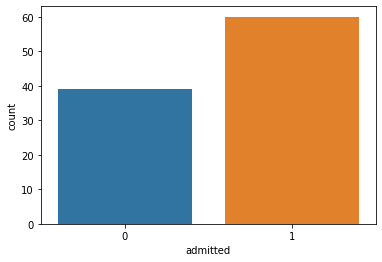

In [10]:
print(df['admitted'].value_counts())
sns.countplot(df.admitted);

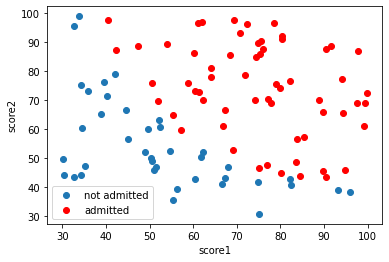

In [11]:
plt.scatter(df[df.admitted==0].score1,df[df.admitted==0].score2,label='not admitted');
plt.scatter(df[df.admitted==1].score1,df[df.admitted==1].score2,color='red',label='admitted');
plt.xlabel('score1');plt.ylabel('score2');plt.legend()

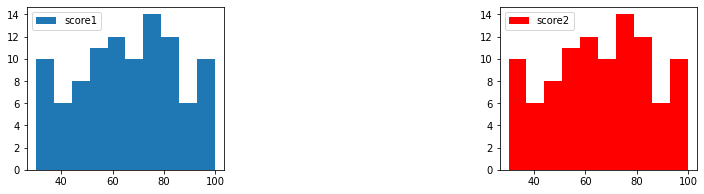

In [12]:
fig2 = plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
df.score1.hist(label='score1',grid=False);
plt.legend()
plt.subplot(1,3,3)
df.score1.hist(label='score2',color='r',grid=False);
plt.legend();

## training

In [13]:
x = df.values[:,:-1]
y = np.asarray(df.admitted).reshape(-1,1)

In [14]:
x_train,x_test,y_train,y_test=split_train_test(x,y,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((79, 2), (20, 2), (79, 1), (20, 1))

In [21]:
clf = LogisticRegressor(lr=.001, train_bias=True, n_reports=20, maxEpoch=200, n_iter_per_epoch=1, n_converLim=1, activ='sigmoid', use_validation=False)
clf.train(x_train, y_train)



 **** EPOCH 1 ****

iter   1: training loss = 35.89


 **** EPOCH 2 ****

iter   1: training loss = 32.22


 **** EPOCH 3 ****

iter   1: training loss = 28.56


 **** EPOCH 4 ****

iter   1: training loss = 24.90


 **** EPOCH 5 ****

iter   1: training loss = 21.24


 **** EPOCH 6 ****

iter   1: training loss = 17.57


 **** EPOCH 7 ****

iter   1: training loss = 13.91


 **** EPOCH 8 ****

iter   1: training loss = 10.25


 **** EPOCH 9 ****

iter   1: training loss = 6.60


 **** EPOCH 10 ****

iter   1: training loss = 3.30


 **** EPOCH 11 ****

iter   1: training loss = 1.68


 **** EPOCH 12 ****

iter   1: training loss = 1.51


 **** EPOCH 13 ****

iter   1: training loss = 1.47


 **** EPOCH 14 ****

iter   1: training loss = 1.43


 **** EPOCH 15 ****

iter   1: training loss = 1.39


 **** EPOCH 16 ****

iter   1: training loss = 1.35


 **** EPOCH 17 ****

iter   1: training loss = 1.31


 **** EPOCH 18 ****

iter   1: training loss = 1.27


 **** EPOCH 19 ****

iter  

In [22]:
clf.bias,clf.weight

(array([1.00199653]),
 array([[-0.01028102],
        [ 0.00475318]]))

In [23]:
from sklearn.metrics import accuracy_score
sk_p = clf.predict(x_test)
model_p = clf.predict(x_test)
print(accuracy_score(y_test,model_p))

0.75
